#### Project Overview:
You’ve been hired as a contractor by a New York City-based e-commerce company that sells clothing online. In addition to their digital platform, they offer in-store styling sessions where customers meet with personal stylists, then order the recommended items via the company’s mobile app or website.

#### Business Objective:
The company wants to determine whether to prioritize improving the mobile app experience or the website experience to drive more sales. Your task is to analyze customer behavior data and provide actionable insights.

#### Imports  the necessary Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the Dataset

In [143]:
data = pd.read_csv(r'D:\4th Semester\BootCamp\DataScience\Machine Learning\Linear Regression Project 1\Ecommerce Customers.csv')

#### Basic Exploration of Data

In [144]:
data.shape

(500, 8)

In [170]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [145]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [146]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [147]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [149]:
print("Total Missing Values in each Column:")
data.isnull().sum()

Total Missing Values in each Column:


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [150]:
print("Total Duplicated Entries:",len(data[data.duplicated()]))

Total Duplicated Entries: 0


### Exploratory Data Analysis

<Figure size 600x600 with 0 Axes>

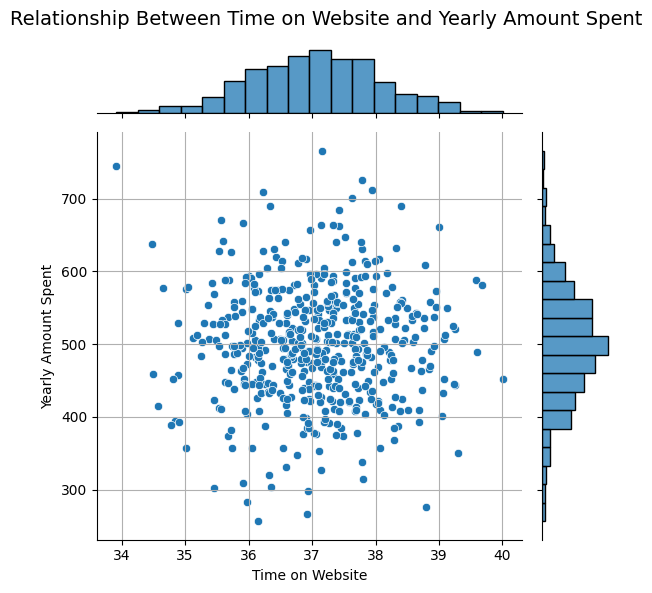

In [151]:
plt.figure(figsize=(6,6))
website_jointplot = sns.jointplot(data=data, x='Time on Website',y='Yearly Amount Spent', kind = 'scatter')
plt.suptitle("Relationship Between Time on Website and Yearly Amount Spent", fontsize=14)
website_jointplot.ax_joint.grid(True)
plt.tight_layout()
plt.show()

There is no strong corelation between the time a user spends on the website and how much they spend yearly.  
Most users spend around 36 - 38 minutes and tend to spend between 400 to 600 dollar annually, but spending does not strongly increase or decrease with time on website.

<Figure size 500x500 with 0 Axes>

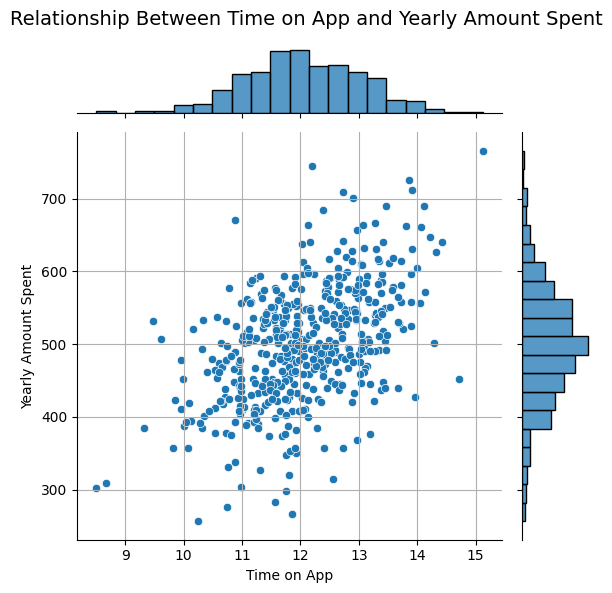

In [152]:
plt.figure(figsize=(5,5))
app_jointplot = sns.jointplot(data=data, x='Time on App',y='Yearly Amount Spent', kind = 'scatter')
plt.suptitle("Relationship Between Time on App and Yearly Amount Spent", fontsize=14)
app_jointplot.ax_joint.grid(True)
plt.tight_layout()
plt.show()

There is a strong positive correlation between the amount of time a user spends on the app and their yearly spending.  
This suggests that users who engage more with the app are likely to spend more money.

<Figure size 500x500 with 0 Axes>

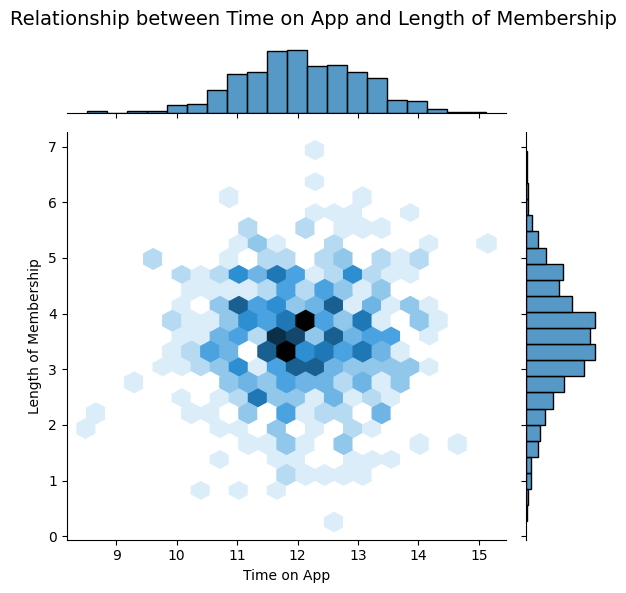

In [153]:
plt.figure(figsize=(5,5))
sns.jointplot(data=data, x='Time on App', y='Length of Membership', kind='hex')
plt.suptitle('Relationship between Time on App and Length of Membership', fontsize=14)
plt.tight_layout()
plt.show()

The plot shows that most users have around 12 minutes of app usage and have been members for about 3.5 - 4 years.     
However, there is no strong correlation between time spent on the app and length of membership -- both new and old users may use the app for similar durations.

In [154]:
# fetcing the dataset having categorical and numerical variable seperately
num_variables = data.select_dtypes(['int','float'])
cat_variables = data.select_dtypes('object')

<Figure size 600x600 with 0 Axes>

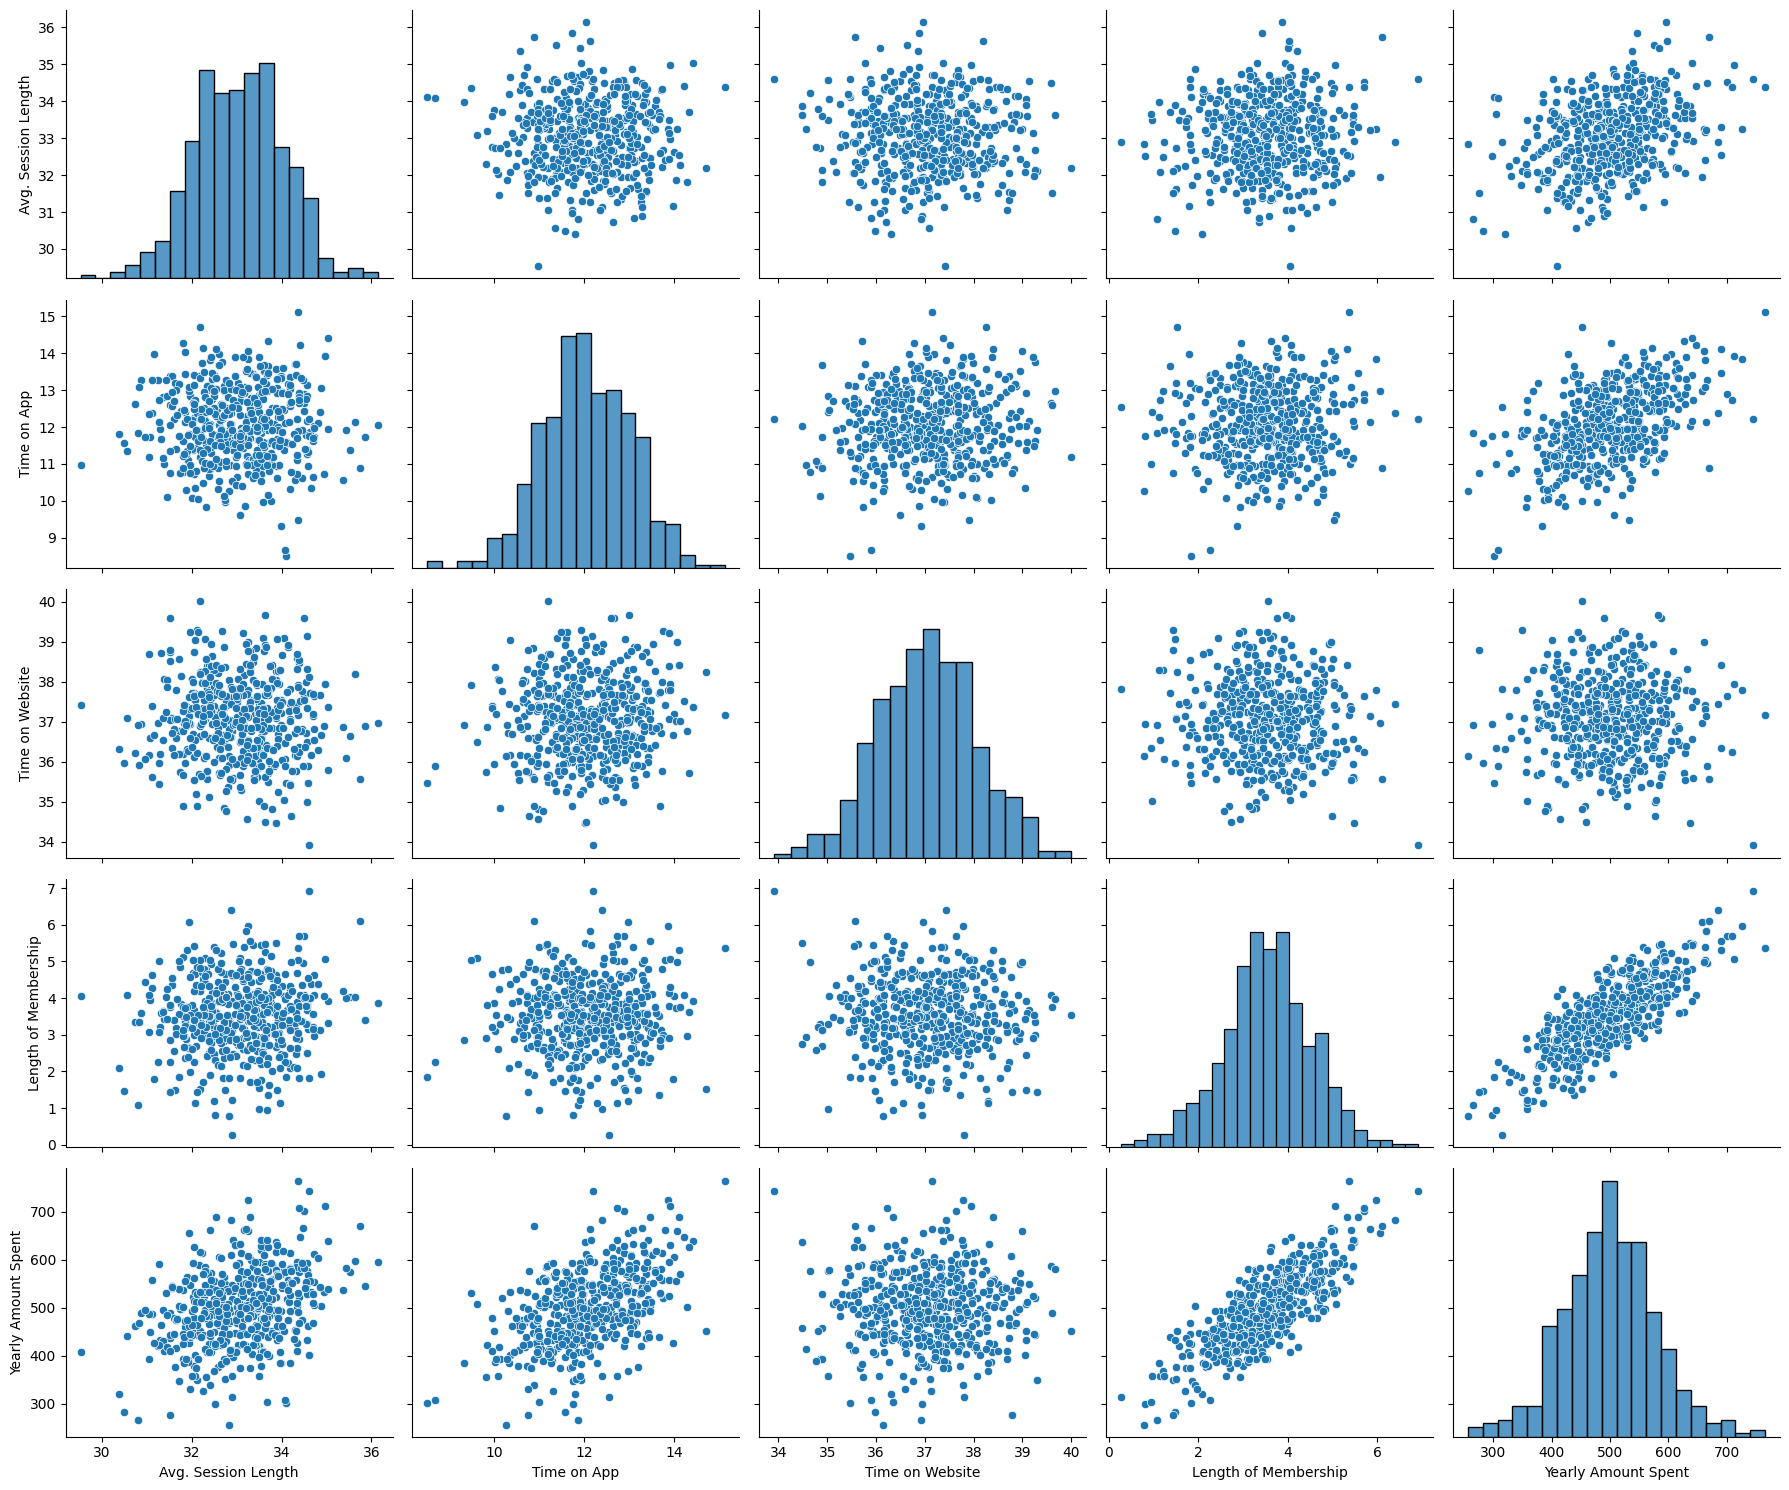

In [155]:
plt.figure(figsize=(6,6))
sns.pairplot(data=num_variables, height=3, aspect=1.2)
plt.tight_layout()
plt.show()

In [156]:
correlation = num_variables.corr('pearson')
correlation

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


**Length of Membership vs. Yearly Amount Spent** shows a strong positive linear relationship. This implies that customers who have been members for longer tend to spend more annually.                  
**Time on App vs. Yearly Amount Spent** also shows a moderate positive correlation.         
**Time on Website vs. Yearly Amount Spent** shows a weak or negative impact on features

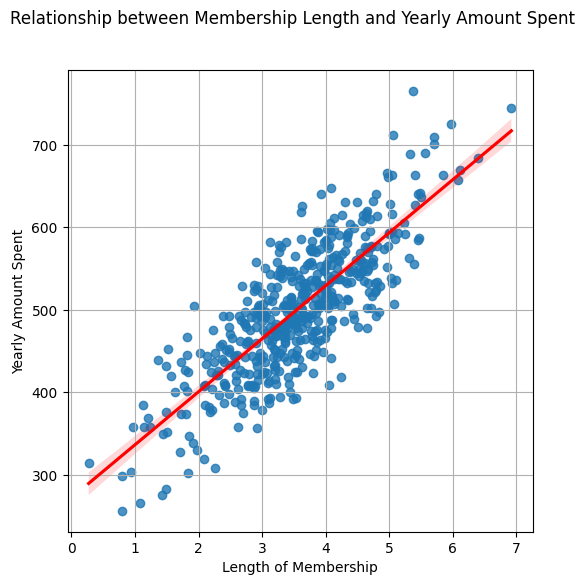

In [157]:
plt.figure(figsize=(6,6))
mem = sns.regplot(data=num_variables, y='Yearly Amount Spent', x='Length of Membership', line_kws={"color":"red"})
plt.suptitle('Relationship between Membership Length and Yearly Amount Spent')
plt.grid(True)
plt.show()

As the Length of Membership increases, the Yearly Amount Spent also tends to increase. This suggests loyal, long-term users are more valuable customers. 

#### Outlier Analysis

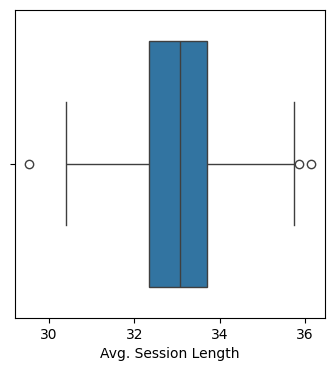

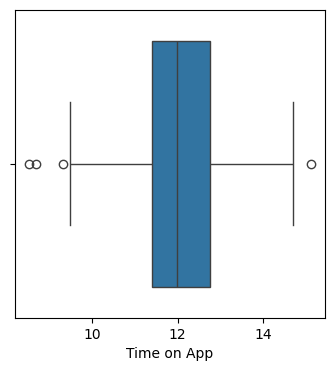

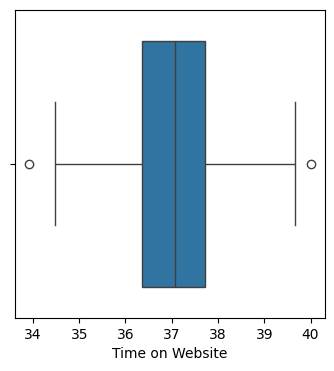

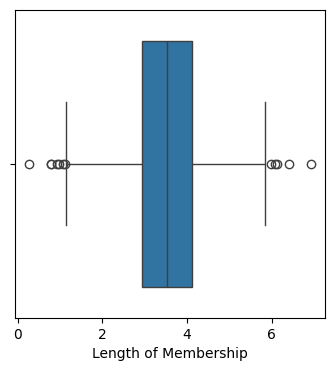

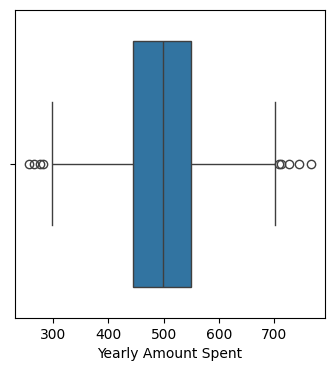

In [158]:
# Checking For Outliers
for i in num_variables:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=data, x=i)

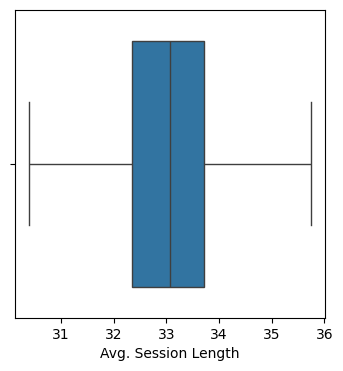

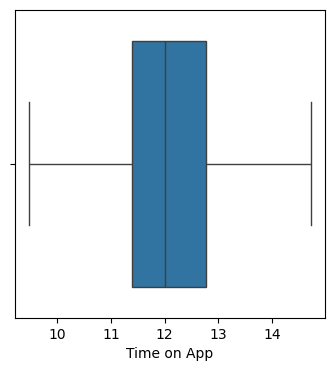

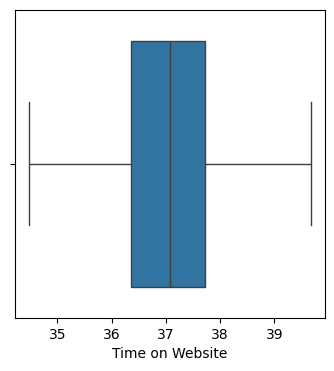

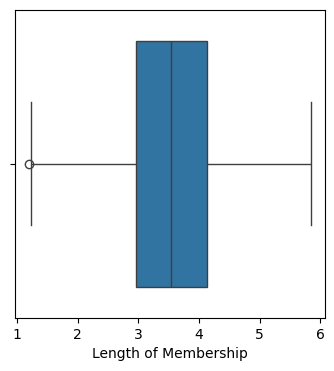

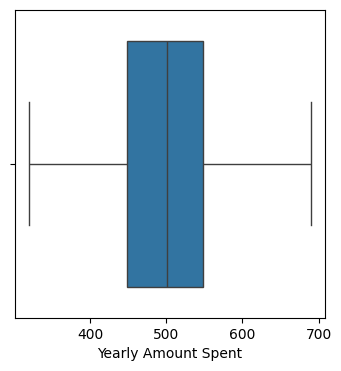

In [159]:
# Removing Outliers
for col in num_variables:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    data = data[(data[col]>= lower_bound) & (data[col]<=upper_bound)]
    plt.figure(figsize=(4,4))
    sns.boxplot(data, x = col)

## Training and Testing Data

Divide the dataset into independent variables (X) and the dependent/target variable (Y), where:   
* X contains the numerical features of customers (e.g., Time on Website, Time on App, etc.).      
* Y contains the Yearly Amount Spent feature, which is our target variable for analysis.

In [160]:
X = data[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
Y = data['Yearly Amount Spent']

The dataset was split into training and testing sets using a 70-30 ratio, meaning 70% of the data was used to train the model, and the remaining 30% was used to evaluate its performance.

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=101)

## Training the Model

Now, it's time to train our model using the Linear Regression algorithm.

In [162]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [163]:
lr.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [164]:
lr.coef_

array([25.99817892, 38.71835647,  0.19394619, 61.51610302])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [165]:
prediction = lr.predict(X_test)
prediction

array([501.13922942, 583.82543895, 355.3870699 , 539.24438426,
       518.02625369, 577.24008823, 486.29664744, 531.78478599,
       412.796411  , 421.31324159, 529.23528427, 512.62357796,
       560.99504114, 393.81485888, 426.88802156, 498.01077361,
       507.31747882, 515.3104593 , 395.13217687, 534.27307523,
       447.43836366, 564.78713699, 501.287746  , 567.58998775,
       588.49426136, 523.87992046, 506.07313341, 551.07579553,
       465.85025864, 497.95683863, 478.66814038, 511.56770672,
       339.39818201, 460.86548976, 495.57112584, 413.59539264,
       500.13892275, 421.52709416, 547.97415586, 425.87014956,
       494.99354655, 439.04779149, 480.89199691, 513.34263126,
       547.05999778, 456.73575729, 490.39012988, 525.22862945,
       472.22105306, 473.06367573, 500.1156192 , 651.42257284,
       481.04706729, 423.84434489, 477.88964313, 437.6117693 ,
       416.93054123, 595.19035223, 504.62971156, 451.13380305,
       488.38214425, 442.72081406, 542.83349038, 487.56

**Create a scatterplot of the real test values versus the predicted values.**

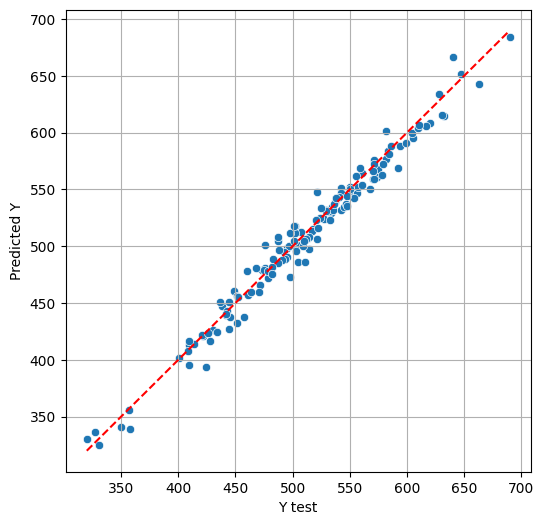

In [166]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_test, y=prediction)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='red',linestyle='--')
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.grid(True)

## Evaluating the Model

To assess the performance of our regression model, we'll calculate the following metrics:

* Residual Sum of Squares
* R² Score (Explained Variance)
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Squared Error
* Root Mean Squared Error (RMSE)


In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Residual Sum of Squares
rss = ((y_test - prediction)**2).sum()

# Explained Variance (R^2)
r2 = r2_score(y_test, prediction)

# Mean Absolute Error
mae = mean_absolute_error(y_test, prediction)

# Mean Squares Error
mse = mean_squared_error(y_test, prediction)

# Root Squared Error
rse = mean_squared_error(y_test, prediction)

# Root Mean Squared Error
rmse = np.sqrt(mse)

nrmse = rmse / (y_test.max() - y_test.min())

print(f"Residual Sum of Squares (RSS): {rss}")
print(f"Explained Variance Score (R^2): {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squares Error: {mse}")
print(f"Root Squared Error: {rse}")
print(f"Root Mean Squared Error: {rmse}")
print("Normalise rmse:",nrmse)


Residual Sum of Squares (RSS): 15788.019257874806
Explained Variance Score (R^2): 0.9770215696568375
Mean Absolute Error: 8.164878753476899
Mean Squares Error: 110.40572907604759
Root Squared Error: 110.40572907604759
Root Mean Squared Error: 10.507413053461237
Normalise rmse: 0.028409260285053764


The model performs very well, with high R² and low errors. 97.7% of the variance in the data is explained, and the normalized RMSE of 2.84% suggests accurate predictions relative to the target range.
The metrics indicate that this model is reliable and well-fitted for the task.

## Checking Residuals 
To ensure our regression model is valid, the residuals (errors) should be normally distributed around zero. 

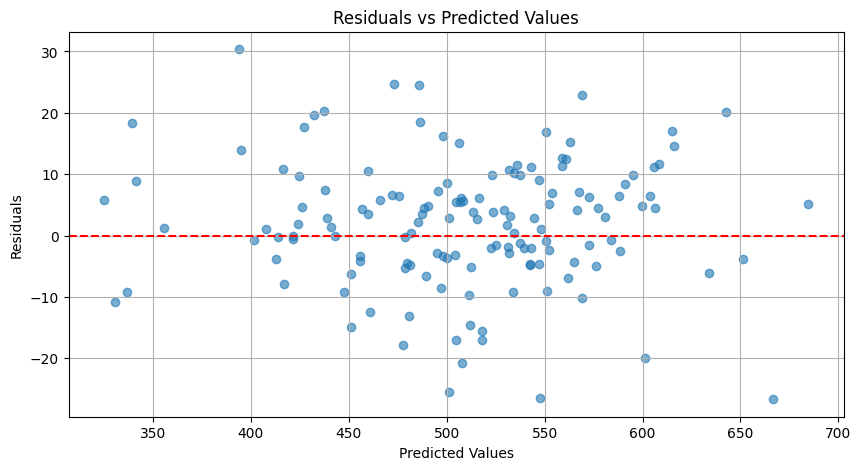

In [ ]:
residuals = y_test - prediction
plt.figure(figsize=(10, 5))
plt.scatter(x=prediction, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


Our model meets the constant variance assumption of linear regression, at least visually.
The residuals appear randomly scattered around the red zero line. There's no clear funnel shape, curve, or pattern. The spread of residuals is fairly consistent across the range of predicted values.

#### Conclusion
**We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.**


Length of Membership has the strongest positive impact on yearly spending.
* Retaining users longer should be a top priority.

Time on App also has a significant positive influence.
* Investing in the mobile app experience can drive higher customer spending.

Avg. Session Length contributes moderately to spending.
* Enhancing session quality may also help, but to a lesser extent.

Time on Website has a negligible impact.
* Focusing efforts on website development is not likely to yield much return.

**Do you think the company should focus more on their mobile app or on their website?**

Yes, the company should focus more on their mobile app rather than the website.